<a href="https://colab.research.google.com/github/mahedishato/ML/blob/main/Breast_cancer_Various_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/CSV/breast-cancer (1).csv')

In [62]:
print(df.head())
print(df.tail())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [63]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [64]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [65]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [66]:
px.histogram(data_frame=df, x='area_mean', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [67]:
px.histogram(data_frame=df, x='radius_mean', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [68]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [69]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [70]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [71]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [72]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [73]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [74]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [75]:
df.drop('id', axis=1, inplace=True)

In [76]:
df.shape

(569, 31)

In [77]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [78]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [79]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [80]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [81]:
corr= df.corr()

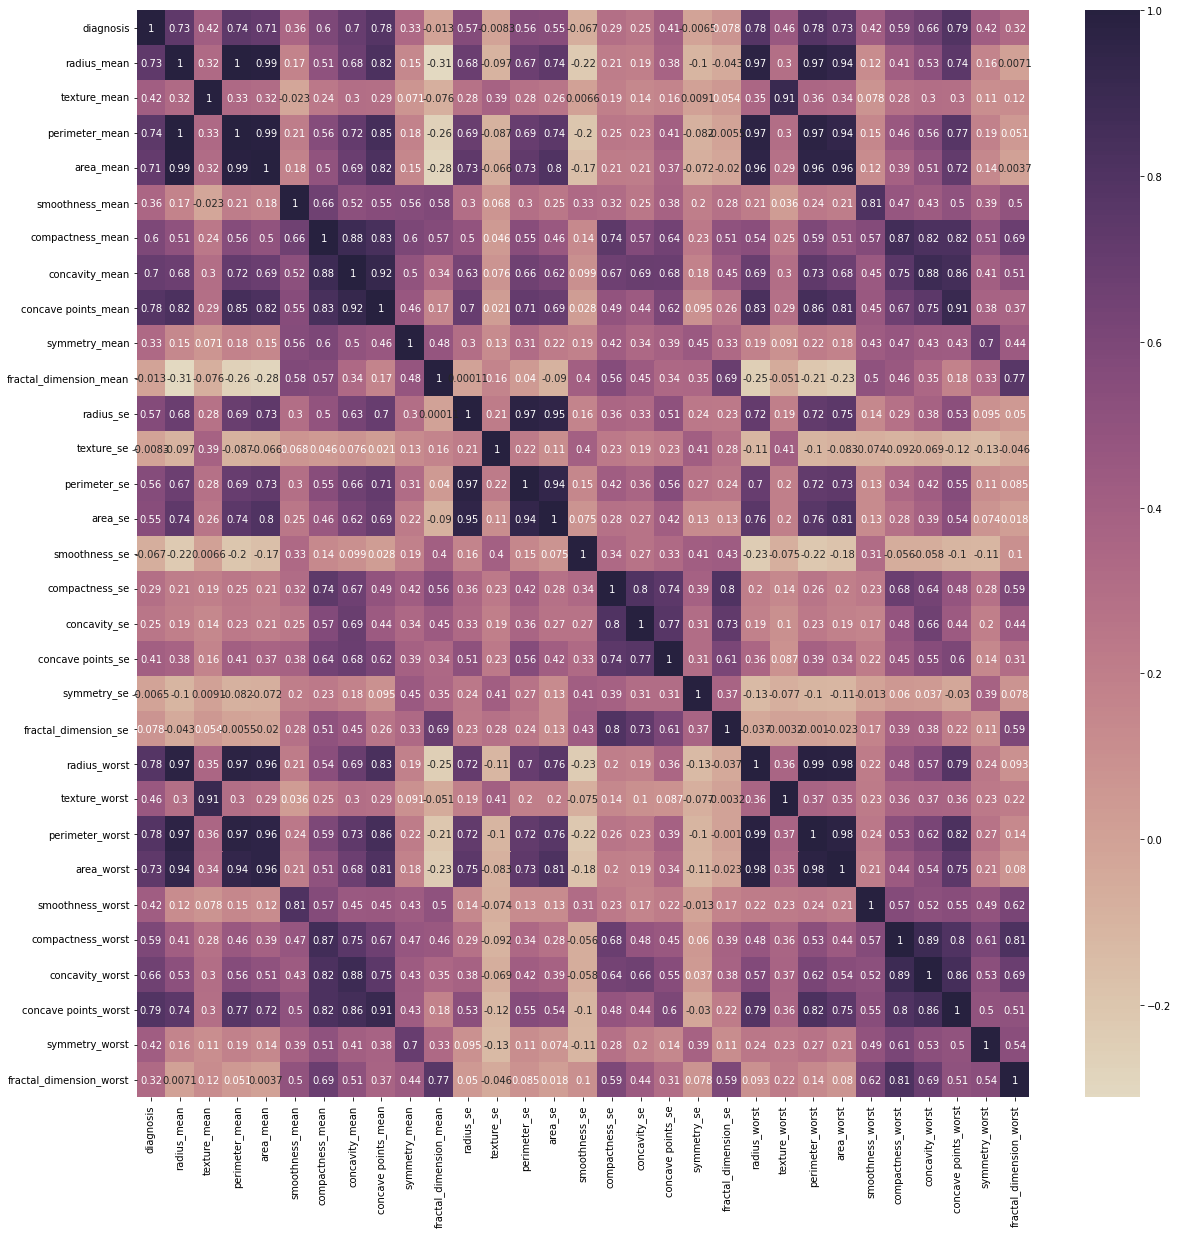

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

In [83]:
names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [84]:
x= df[names]
y= df['diagnosis']

In [85]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(x_train) # fit it to the training data

scaler.transform(x_train) #transform training data
scaler.transform(x_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [86]:
def train_evaluate_model(model, x_train, y_train, x_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(x_train, y_train)  #fit the model instance 


    predictions = model.predict(x_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

LogisticRegression

In [87]:
lg = LogisticRegression()

results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [88]:
results.index = ['LogisticRegression']

In [89]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


DecisionTreeClassifier

In [90]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)

In [91]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


KNearestNeighbors

In [92]:
KNN = KNeighborsClassifier(n_neighbors=12)

In [93]:
knn = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)

In [94]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116


RandomForestClassifer

In [95]:
rfc = RandomForestClassifier()
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074


XGBoost

In [96]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, x_train, y_train, x_test, y_test)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

In [97]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074


Naive Bayes¶


In [98]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, x_train, y_train, x_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = results.append(Naive_Bayes_result)

In [99]:
results.head(6).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116


Neural Network

In [100]:
def scheduler(epoch, lr):
    
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

inputs = Input(shape=x.shape[-1])
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=140)
predictions = model.predict(x_test)

Epoch 1/140
15/15 [==============================] - 2s 2ms/step - loss: 0.7903 - accuracy: 0.4440
Epoch 2/140
15/15 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6088
Epoch 3/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7121
Epoch 4/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7187
Epoch 5/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7802
Epoch 6/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7912
Epoch 7/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8264
Epoch 8/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8396
Epoch 9/140
15/15 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8593
Epoch 10/140
15/15 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8484
Epoch 11/

In [102]:
predictions = model.predict(x_test)
predictions = (predictions > 0.4) # Recall is more important for medical diagnosis
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])

4/4 [==============================] - 0s 5ms/step


In [103]:
nn_df.index = ['NeuralNetwork']

results = results.append(nn_df)

In [104]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
NeuralNetwork,0.973684,0.966292,0.934783,1.000000,0.978873


In [105]:
X_all_features = df.drop('diagnosis',axis=1)
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [106]:
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = results.append(LogisticRegression_all_features)

DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = results.append(DecisionTree_all_features)


KNearsNeighbors_all_features =  train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)

KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = results.append(KNearsNeighbors_all_features)

RandomForest_all_features = train_evaluate_model(rfc,X_train_all_features, y_train, X_test_all_features, y_test)

RandomForest_all_features.index = ['RandomForest_all_features']
results = results.append(RandomForest_all_features)
XGBoost_all_features = train_evaluate_model(xgboost,X_train_all_features, y_train, X_test_all_features, y_test)

XGBoost_all_features.index = ['XGBoost_all_features']
results = results.append(XGBoost_all_features)


Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes,X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['NaiveBayes_all_features']

results = results.append(Naive_Bayes_all_features)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [107]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
NeuralNetwork,0.973684,0.966292,0.934783,1.000000,0.978873
LogisticRegression_all_features,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree_all_features,0.929825,0.906977,0.906977,0.906977,0.925319
KNearsNeighbors_all_features,0.973684,0.963855,1.000000,0.930233,0.965116


In [108]:
models = results.T.columns.values
models= models[0:7]

In [109]:
models

array(['LogisticRegression', 'DecisionTree', 'KNearsNeighbors',
       'RandomForest', 'XGBoost', 'NaiveBayes', 'NeuralNetwork'],
      dtype=object)

In [110]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

In [111]:
fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

In [112]:
  fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['precision'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

In [113]:
fig = px.bar(x=results.iloc[:7,3].values, y =models,orientation='h',color=results['recall'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()

In [114]:
fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()